In [2]:
import scipy.stats as sps
import numpy as np
import matplotlib.pyplot as plt
teta = 7
betta = 0.95
n = 100

In [4]:
x_n = sps.pareto.rvs(b =teta-1, size = n)
print(x_n)
print("med = ", np.median(x_n))

[1.31068004 1.16224137 1.2330949  1.19145881 1.08158508 1.0023562
 1.11542301 1.14061489 1.06511049 1.05065198 1.0500172  1.02772748
 1.03537801 1.02551081 1.36532186 1.10805767 1.10094021 1.04596191
 1.23009511 1.04736385 1.08099959 1.32506682 1.19365112 1.13196742
 1.05036298 1.05079519 1.31505424 1.24896106 1.13449706 1.13766128
 1.08000406 1.01268957 1.36150504 1.01809501 1.38314965 1.33326319
 1.27678047 1.01719645 1.02752665 1.14218747 1.06469757 2.19616199
 1.35853751 1.05417931 1.42718677 1.28758698 1.25256857 1.03068084
 1.41705228 1.07169628 1.11310902 1.03294504 1.04199196 1.20488496
 1.1123487  1.21869858 2.35398873 1.3102769  1.05625406 1.06994709
 1.50111356 1.36542693 1.68395919 1.0230741  1.00825709 1.10970695
 1.24844361 1.18516259 1.16121749 1.09171795 1.23685476 1.02499157
 1.05531935 1.14978861 1.25314539 1.35038837 1.17430919 1.20392824
 1.25450828 1.45676949 1.07422868 1.10674365 1.18985436 1.04679895
 1.48613342 1.14685461 1.12206074 1.87932514 1.21739317 1.22995

## ПУНКТ D(b)

In [5]:
# Асимптотический доверительный интервал для med (через ММП)

teta_mmp = n/np.sum(np.log(x_n)) + 1
t1 = sps.norm(loc = 0, scale = 1).ppf((1-betta)/2)
t2 = sps.norm(loc = 0, scale = 1).ppf((1+betta)/2)

board1 = 2**((teta_mmp - 1)**(-1)) - (np.log(2) * 2**((teta_mmp - 1)**(-1)) * t2) / (n**0.5 * (teta_mmp - 1)) 
board2 = 2**((teta_mmp - 1)**(-1)) - (np.log(2) * 2**((teta_mmp - 1)**(-1)) * t1) / (n**0.5 * (teta_mmp - 1))
l = board2 - board1
print(f"Доверительный интервал: ({ board1}; { board2})")
print(f"Длина доверительного интервала {l}")

Доверительный интервал: (1.0951134221269605; 1.144863241730338)
Длина доверительного интервала 0.04974981960337743


## ПУНКТ D(c)

In [6]:
# Асимптотический доверительный интервал для параметра teta (через ММП)

teta_mmp = n/np.sum(np.log(x_n)) + 1
t1 = sps.norm(loc = 0, scale = 1).ppf((1-betta)/2)
t2 = sps.norm(loc = 0, scale = 1).ppf((1+betta)/2)

board1_mmp = teta_mmp - ((teta_mmp - 1) * t2) / n**0.5
board2_mmp = teta_mmp - ((teta_mmp - 1) * t1) / n**0.5
l = board2_mmp - board1_mmp
print(f"Доверительный интервал: ({board1_mmp}; {board2_mmp})")
print(f"Длина доверительного интервала {l}")

Доверительный интервал: (5.917943441011546; 8.31569190976295)
Длина доверительного интервала 2.397748468751405


## ПУНКТ t

In [7]:
# Бутстраповский параметрический доверительный интервал

def get_bootstrap(teta_cur, N_cur):
    sample = np.array([sps.pareto.rvs(b =teta_cur-1, size = n) for i in range (N_cur)])
    return sample

teta_mmp = n/np.sum(np.log(x_n)) + 1
N = 50000
x_boot = get_bootstrap(teta_mmp, N)
x_boot_omm = np.sort(n / np.sum(np.log(x_boot), axis = 1) + 1) # вариац ряд
k1 = int((1 - betta) * N / 2)
k2 = int((1 + betta) * N / 2)

board1_boot_p = x_boot_omm[k1]
board2_boot_p = x_boot_omm[k2]
l = board2_boot_p - board1_boot_p
print(f"Доверительный интервал: ({board1_boot_p}; {board2_boot_p})")
print(f"Длина доверительного интервала {l}")


Доверительный интервал: (6.069968907823389; 8.526966031449351)
Длина доверительного интервала 2.4569971236259622


In [8]:
# Бутстраповский непараметрический доверительный интервал

def get_bootstrap(x, n_sample):
    sample = np.random.choice(x, size = (x.size, n_sample), replace = True)
    return sample

N = 1000
x_boot = get_bootstrap(x_n, N)
teta_mmp = n/np.sum(np.log(x_n)) + 1
teta_boot = n / np.sum(np.log(x_boot), axis = 0) + 1

delta = teta_boot - teta_mmp
delta_sort = np.sort(delta) 
k1 = int((1 - betta) * N / 2)
k2 = int((1 + betta) * N / 2)

board1_boot = teta_mmp - delta_sort[k2]
board2_boot = teta_mmp - delta_sort[k1]
l = board2_boot - board1_boot
print(f"Доверительный интервал: ({board1_boot}; {board2_boot})")
print(f"Длина доверительного интервала {l}")

Доверительный интервал: (5.830244523380852; 8.120727245969821)
Длина доверительного интервала 2.290482722588969


## ПУНКТ f

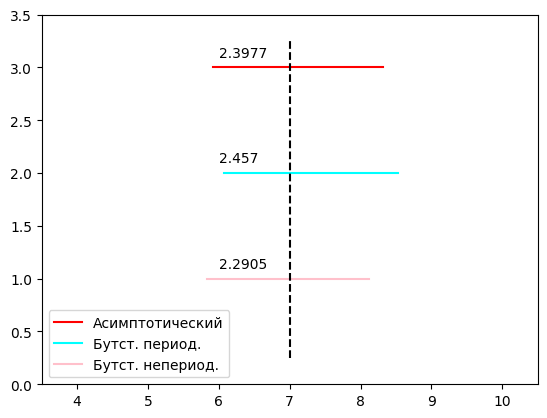

In [11]:
# Сравнение доверительных интервалов

plt.xlim(teta*0.5, teta*1.5)
plt.ylim(0, 3.5)

plt.text(teta - 1, 3.1, round(board2_mmp - board1_mmp, 4))
plt.plot([board1_mmp, board2_mmp], [3,3], color='red', label = "Асимптотический")

plt.text(teta - 1, 2.1, round(board2_boot_p - board1_boot_p, 4))
plt.plot([board1_boot_p, board2_boot_p], [2,2], color='aqua', label = "Бутст. период.")

plt.text(teta - 1, 1.1, round(board2_boot - board1_boot, 4))
plt.plot([board1_boot, board2_boot], [1,1], color='pink', label = "Бутст. непериод.")

plt.plot([teta, teta], [0.25,3.25], color='black', linestyle='--')
plt.legend()
